# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# 2.Import Dataset

In [2]:
train_data=pd.read_csv('SalaryData_Train(1).csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data=pd.read_csv('SalaryData_Test(1).csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# 3.Data Understanding

In [4]:
train_data.shape,test_data.shape

((30161, 14), (15060, 14))

In [5]:
train_data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [6]:
test_data['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [7]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
train_data.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

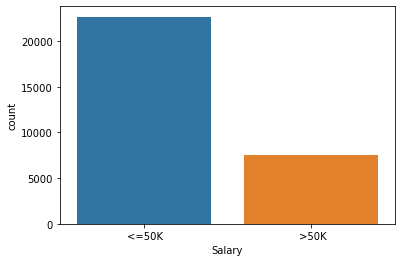

In [12]:
sns.countplot('Salary',data=train_data)

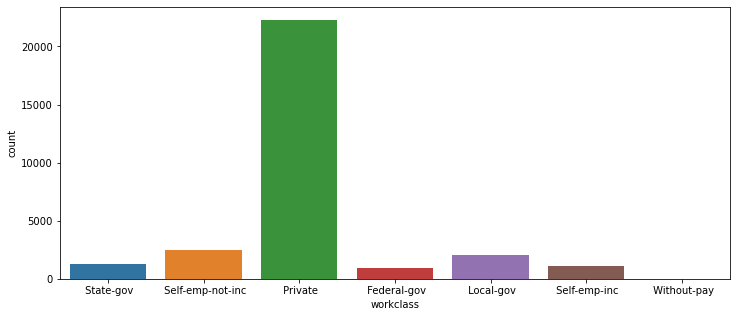

In [13]:
plt.figure(figsize=(12,5))
sns.countplot('workclass',data=train_data)
plt.show()

In [14]:
corr_matrix=train_data.corr()

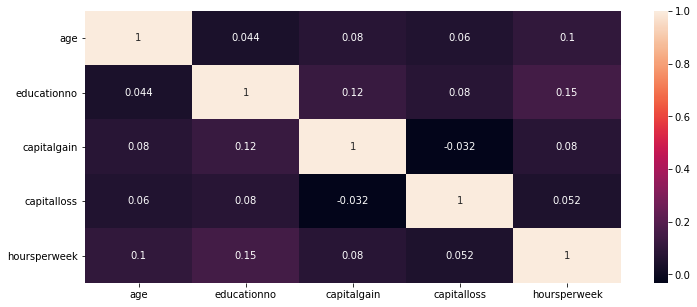

In [15]:
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# 4.Data Preprocessing

In [16]:
#encoding
lb=LabelEncoder()
train_data['workclass']=lb.fit_transform(train_data['workclass'])
train_data['education']=lb.fit_transform(train_data['education'])
train_data['maritalstatus']=lb.fit_transform(train_data['maritalstatus'])
train_data['occupation']=lb.fit_transform(train_data['occupation'])
train_data['race']=lb.fit_transform(train_data['race'])
train_data['sex']=lb.fit_transform(train_data['sex'])
train_data['native']=lb.fit_transform(train_data['native'])
train_data['Salary']=lb.fit_transform(train_data['Salary'])
train_data['relationship']=lb.fit_transform(train_data['relationship'])

In [17]:
train_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [18]:
#encoding
lb=LabelEncoder()
test_data['workclass']=lb.fit_transform(test_data['workclass'])
test_data['education']=lb.fit_transform(test_data['education'])
test_data['maritalstatus']=lb.fit_transform(test_data['maritalstatus'])
test_data['occupation']=lb.fit_transform(test_data['occupation'])
test_data['race']=lb.fit_transform(test_data['race'])
test_data['sex']=lb.fit_transform(test_data['sex'])
test_data['native']=lb.fit_transform(test_data['native'])
test_data['Salary']=lb.fit_transform(test_data['Salary'])
test_data['relationship']=lb.fit_transform(test_data['relationship'])

In [19]:
test_data.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

# 5.Model Building

In [20]:
X_train=train_data.drop('Salary',axis=1)
y_train=train_data[['Salary']]

In [21]:
X_train.shape,y_train.shape

((30161, 13), (30161, 1))

### Standardizing

In [22]:
std_scaler=StandardScaler()
X_scaled=std_scaler.fit_transform(X_train)
X_scaled=pd.DataFrame(data=X_scaled,columns=X_train.columns)
X_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.208958,-0.874459,0.736740,-0.387243,1.498958,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.244681,0.266358
30157,0.118914,-0.208958,0.174805,-0.439733,-0.387243,0.009964,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
30158,1.489339,-0.208958,0.174805,-0.439733,2.282996,-1.479030,1.612204,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358
30159,-1.251511,-0.208958,0.174805,-0.439733,0.947877,-1.479030,0.987725,0.385055,0.692771,-0.147447,-0.218508,-1.747187,0.266358


In [23]:
X_test=test_data.drop('Salary',axis=1)
y_test=test_data[['Salary']]

### Here they have given separate set to validation so we no need to split it

# kernel=rbf

In [24]:
sv_model=SVC()

# 6.Model Training

In [25]:
sv_model.fit(X_scaled,y_train)

SVC()

# 7.Model Testing | Model Evaluation

#### Train data

In [26]:
y_pred_train_1=sv_model.predict(X_train)

In [28]:
print(accuracy_score(y_train,y_pred_train_1))
print('====================================')
print(confusion_matrix(y_train,y_pred_train_1))
print('====================================')
print(classification_report(y_train,y_pred_train_1))

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161



#### Test data

In [36]:
y_pred_test_1=sv_model.predict(X_test)

In [30]:
print(accuracy_score(y_test,y_pred_test_1))
print('====================================')
print(confusion_matrix(y_test,y_pred_test_1))
print('====================================')
print(classification_report(y_test,y_pred_test_1))

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161



# kernel=sigmoid

In [31]:
model2=SVC(kernel='sigmoid')

# Model Training

In [32]:
model2.fit(X_scaled,y_train)

SVC(kernel='sigmoid')

# Model Testing | Model Evaluation

#### Train data

In [34]:
y_pred_train_2=model2.predict(X_train)

In [35]:
print(accuracy_score(y_train,y_pred_train_2))
print('====================================')
print(confusion_matrix(y_train,y_pred_train_2))
print('====================================')
print(classification_report(y_train,y_pred_train_2))

0.24017771294055237
[[ 1343 21310]
 [ 1607  5901]]
              precision    recall  f1-score   support

           0       0.46      0.06      0.10     22653
           1       0.22      0.79      0.34      7508

    accuracy                           0.24     30161
   macro avg       0.34      0.42      0.22     30161
weighted avg       0.40      0.24      0.16     30161



#### Test data

In [41]:
y_pred_test_2=model2.predict(X_test)

In [42]:
print(accuracy_score(y_test,y_pred_test_2))
print('====================================')
print(confusion_matrix(y_test,y_pred_test_2))
print('====================================')
print(classification_report(y_test,y_pred_test_2))

0.23725099601593624
[[  657 10703]
 [  784  2916]]
              precision    recall  f1-score   support

           0       0.46      0.06      0.10     11360
           1       0.21      0.79      0.34      3700

    accuracy                           0.24     15060
   macro avg       0.34      0.42      0.22     15060
weighted avg       0.40      0.24      0.16     15060



# if kernel=sigmoid it gives very bad accuracy

# kernel=polynomial

In [43]:
model3=SVC(kernel='poly')

# Training model 

In [44]:
model3.fit(X_scaled,y_train)

SVC(kernel='poly')

# Model Testing | Model Evalution

#### Train data

In [45]:
y_pred_train_3=model3.predict(X_train)

In [46]:
print(accuracy_score(y_train,y_pred_train_2))
print('====================================')
print(confusion_matrix(y_train,y_pred_train_2))
print('====================================')
print(classification_report(y_train,y_pred_train_2))

0.24017771294055237
[[ 1343 21310]
 [ 1607  5901]]
              precision    recall  f1-score   support

           0       0.46      0.06      0.10     22653
           1       0.22      0.79      0.34      7508

    accuracy                           0.24     30161
   macro avg       0.34      0.42      0.22     30161
weighted avg       0.40      0.24      0.16     30161



#### Test data

In [47]:
y_pred_test_3=model3.predict(X_test)

In [48]:
print(accuracy_score(y_test,y_pred_test_3))
print('====================================')
print(confusion_matrix(y_test,y_pred_test_3))
print('====================================')
print(classification_report(y_test,y_pred_test_3))

0.7752324037184595
[[10534   826]
 [ 2559  1141]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11360
           1       0.58      0.31      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.69      0.62      0.63     15060
weighted avg       0.75      0.78      0.75     15060



# if kernel=poly it is giving bad accuracy

# kernel=linear

In [49]:
model4=SVC(kernel='linear')

# Model Training

In [50]:
model4.fit(X_scaled,y_train)

SVC(kernel='linear')

# Model Testing

#### Train data

In [51]:
y_pred_train_4=model4.predict(X_train)

In [53]:
print(accuracy_score(y_train,y_pred_train_4))
print('====================================')
print(confusion_matrix(y_train,y_pred_train_4))
print('====================================')
print(classification_report(y_train,y_pred_train_4))

0.24893073837074367
[[    0 22653]
 [    0  7508]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22653
           1       0.25      1.00      0.40      7508

    accuracy                           0.25     30161
   macro avg       0.12      0.50      0.20     30161
weighted avg       0.06      0.25      0.10     30161



# Even for kernel=linear it is giving bad accuracy

## Now will try change c and gamma for better accuracy with kernel=rbf

In [57]:
def find(gamma,C=1):
    model=SVC(gamma=gamma,C=C)
    model.fit(X_scaled,y_train)
    y_pred=model.predict(X_train)
    print(accuracy_score(y_train,y_pred))
    print('====================================')
    print(confusion_matrix(y_train,y_pred))
    print('====================================')
    print(classification_report(y_train,y_pred))
    print('test data')
    print('====================================')
    y_pred_t=model.predict(X_test)
    print(accuracy_score(y_test,y_pred_t))
    print('====================================')
    print(confusion_matrix(y_test,y_pred_t))
    print('====================================')
    print(classification_report(y_test,y_pred_t))
    return model

## keeping c constant

In [58]:
find(0.001)

0.7493783362620603
[[22601    52]
 [ 7507     1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.02      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.57      0.75      0.64     30161

test data
0.7523904382470119
[[11331    29]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=1, gamma=0.001)

In [59]:
find(0.1)

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161

test data
0.7543160690571049
[[11360     0]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=1, gamma=0.1)

In [60]:
find(1.0)

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161

test data
0.7543160690571049
[[11360     0]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=1, gamma=1.0)

In [62]:
find(10.0)

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161

test data
0.7543160690571049
[[11360     0]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=1, gamma=10.0)

In [63]:
find(50,3)

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161

test data
0.7543160690571049
[[11360     0]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=3, gamma=50)

In [64]:
find(50,10)

0.7510692616292564
[[22653     0]
 [ 7508     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22653
           1       0.00      0.00      0.00      7508

    accuracy                           0.75     30161
   macro avg       0.38      0.50      0.43     30161
weighted avg       0.56      0.75      0.64     30161

test data
0.7543160690571049
[[11360     0]
 [ 3700     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11360
           1       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060



SVC(C=10, gamma=50)

# Here it is more time taking process because SVM uses Neural Networks concept so with optimal value we may increase accuracy but it is a time taking process